In [7]:
#"Elvis, Jamil, Jacob certify that the code and data in this assignment were generated independently, using only the tools
#and resources defined in the course and that we did not receive any external help, coaching, or contributions
#during the production of this work."

import argparse
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pydot
import matplotlib.pyplot as plt
from fileData import *
from netEnv import *
from dqnAgent import *
import time
import pickle
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import cmocean
from math import sqrt
import random
code_path = ".."
#code_path = sys.path[0]
import torch
from torch import nn
import torch.optim as optim
import gym
from collections import deque
import itertools
import numpy as np
import random


In [2]:
requiredFields=['FileCount','AvgFileSize','BufSize','Bandwidth','AvgRtt','CC_Level','P_Level','PP_Level','numActiveCores','frequency','TotalAvgTput','TotalEnergy','DataTransferEnergy']
LabelName='TotalAvgTput'
fileData_chameleon=ReadFile(code_path+'/Dataset/Chameleon_Combined_all.csv',requiredFields)
optimal_throughput_dictionary_chameleon=fileData_chameleon.return_map_for_tuple_to_throughput()
filedata_grouped_df=fileData_chameleon.get_grouped_df()
print("There are total %d number of groups based on FileCount, AvgFileSize,BufSize, Bandwidth, AvgRtt"%filedata_grouped_df.ngroups)

There are total 38 number of groups based on FileCount, AvgFileSize,BufSize, Bandwidth, AvgRtt


In [20]:
total_keys=list(filedata_grouped_df.groups.keys())


In [22]:
agent_list=[]
agent_network_name=[]
# for key in total_keys[0:2]:
for key in range (2):
    selectedgroup=environmentGroup(fileData_chameleon.get_grouped_df(),total_keys[key])
    env = NetEnvironment(selectedgroup)
    if len(agent_list)==0:
        agent=DQNAgent(env,EPSILON_DECAY=400000)
        agent.warming_replay_buffer()
        print(f"Training for {total_keys[key]} group {agent.env.environment_group_identification}")
        agent.training(TRAINING_STEPS=500000)
        agent.save_model()
#         old_online_net_parameters=agent.online_net.state_dict()
#         old_target_net_parameters=agent.target_net.state_dict()
        agent_list.append(agent)
        agent_network_name.append('agent'+str(agent.env.environment_group_identification)+"online_net")        
    else:
        agent=DQNAgent(env,EPSILON_DECAY=400000)
#         agent.target_net.load_state_dict(agent_list[key-1].target_net.state_dict())
#         agent.online_net.load_state_dict(agent_list[key-1].online_net.state_dict())
        agent.warming_replay_buffer()
        agent.load_model(agent_network_name[key-1],agent_network_name[key-1])
        print(f"Training for {total_keys[key]} group {agent.env.environment_group_identification}")
        agent.training(TRAINING_STEPS=2000)
        agent.save_model()
#         old_online_net_parameters=agent.online_net.state_dict()
#         old_target_net_parameters=agent.target_net.state_dict()
        agent_list.append(agent)

Training for (32, 34.9238114, 40, 10, 30) group (32, 34.9238114, 40, 10, 30)

step 0
Avg Rew 0.0

step 1000
Avg Rew 47.06191525563816
Training for (32, 34.9238114, 40, 10, 40) group (32, 34.9238114, 40, 10, 40)

step 0
Avg Rew 0.0


IndexError: list index out of range

In [30]:
agent_list=[]
for key in total_keys[0:5]:
    t = time.time()
    selectedgroup=environmentGroup(fileData_chameleon.get_grouped_df(),key)
    env = NetEnvironment(selectedgroup)
    agent=DQNAgent(env,EPSILON_DECAY=400000)
    agent.warming_replay_buffer()
    print(f"Training for {key} group {agent.env.environment_group_identification}")
    agent.training(TRAINING_STEPS=500000)
    agent.save_model()
    agent_list.append(agent)
    print(f"training time for {agent.env.environment_group_identification} is {time.time()- t} seconds")
    

Training for (32, 34.9238114, 40, 10, 30) group (32, 34.9238114, 40, 10, 30)

step 0
Avg Rew 0.0

step 1000
Avg Rew 45.83896786991754

step 2000
Avg Rew 48.18309156823947

step 3000
Avg Rew 48.857650573624895

step 4000
Avg Rew 49.43646435691673

step 5000
Avg Rew 49.51337898526279

step 6000
Avg Rew 49.71478062111174

step 7000
Avg Rew 49.85950197451513

step 8000
Avg Rew 50.02079326282373

step 9000
Avg Rew 50.24621955256247

step 10000
Avg Rew 50.90485567451019

step 11000
Avg Rew 51.03068234513891

step 12000
Avg Rew 50.99282720096535

step 13000
Avg Rew 51.05257823081049

step 14000
Avg Rew 51.05378936748876

step 15000
Avg Rew 51.14269529606866

step 16000
Avg Rew 51.17149317463805

step 17000
Avg Rew 51.18576801245002

step 18000
Avg Rew 51.14923560281509

step 19000
Avg Rew 51.19400222911356

step 20000
Avg Rew 51.111211342069645

step 21000
Avg Rew 50.96812030590662

step 22000
Avg Rew 51.09833223020055

step 23000
Avg Rew 51.28209726194328

step 24000
Avg Rew 51.3912760120084

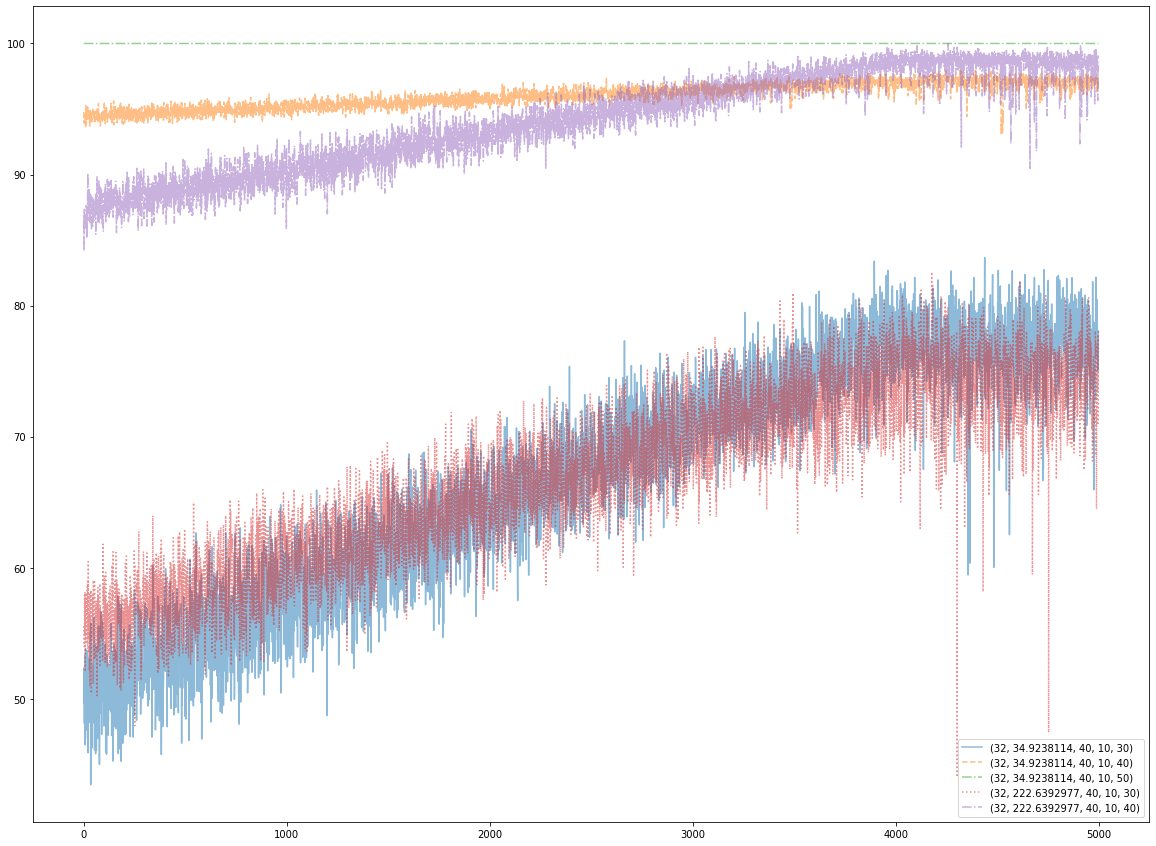

In [53]:
linestyle=["-","--","-.",":","dashdot"]
fig = plt.figure(figsize =(20, 15))
for agent,style in zip(agent_list,linestyle):
    plt.plot(agent.reward_per_episode,label = str(agent.env.environment_group_identification),linestyle=style,alpha=0.5)
plt.legend()

In [43]:
with open("trained_agent_list_dqn", "wb") as fp:
    pickle.dump(agent_list, fp)

In [44]:
with open("trained_agent_list_dqn", "rb") as fp:
    agent_list_loaded = pickle.load(fp)

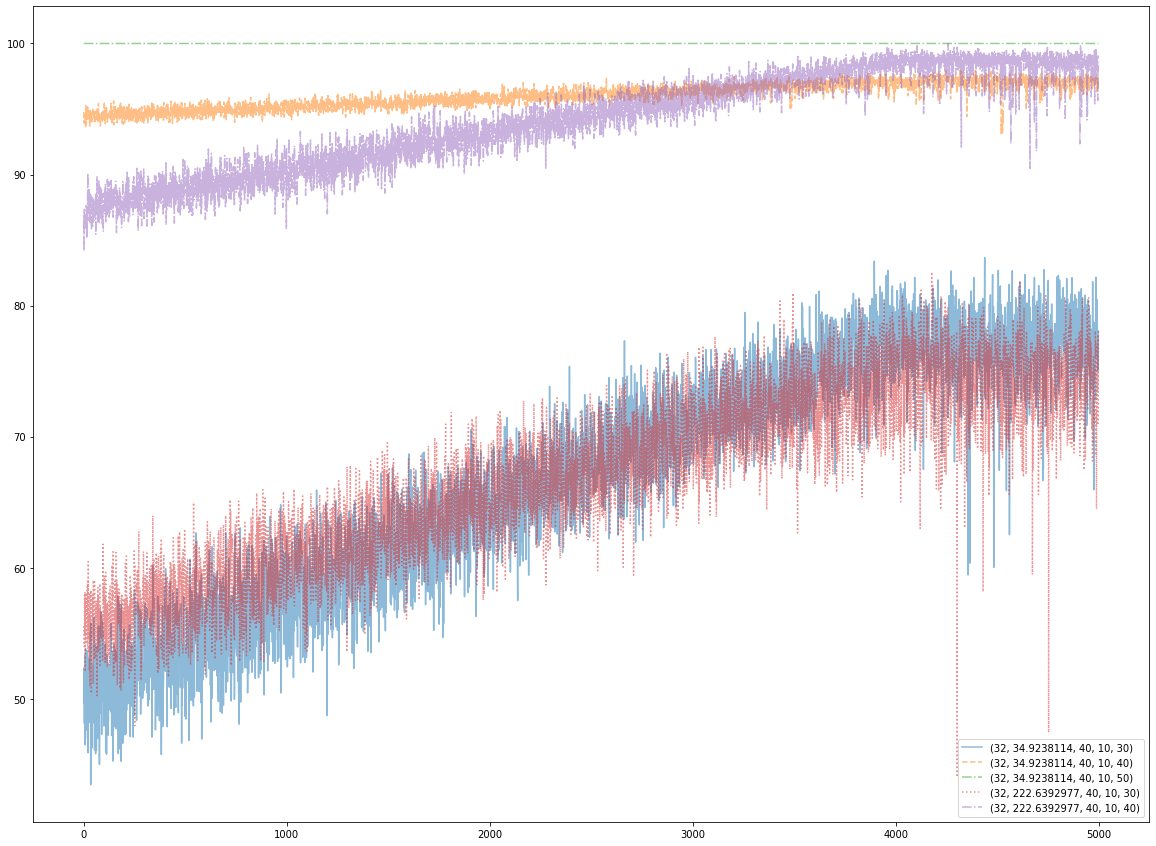

In [52]:
linestyle=["-","--","-.",":","dashdot"]
fig = plt.figure(figsize =(20, 15))
for agent,style in zip(agent_list_loaded,linestyle):
    plt.plot(agent.reward_per_episode,label = str(agent.env.environment_group_identification),linestyle=style,alpha=0.5)
plt.legend()

In [46]:
# fig = plt.figure(figsize =(20, 15))
for agent in agent_list_loaded:
    print("##############################################")
    print(" ")
    print(f"{agent.env.environment_group_identification} group's Max Throughput is {agent.env.max_throughput} with {agent.env.max_throughput_parameters}")
    reward_per_episode_validation,action_list=agent.validation(TOTAL_EPISODES_VALIDATION=3)
    agent.print_action_list_for_validation_episodes(action_list)
    print(" ")
    print("##############################################")
    

##############################################
 
(32, 34.9238114, 40, 10, 30) group's Max Throughput is 8191.376288 with (16.0, 1.0, 8.0)
Validation episode  0  actions taken
[(8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 16), (8, 1, 1

In [ ]:
group_env = GroupNetWrapper()
initialize = True
for key in total_keys[0:5]:
    t = time.time()
    selectedgroup=environmentGroup(fileData_chameleon.get_grouped_df(),key)
    env = NetEnvironment_glob(selectedgroup)
    group_env.add(env)
    if initialize:
        agent=DQNAgent_glob(group_env,EPSILON_DECAY=400000)
        initialize = False
    agent.warming_replay_buffer()
    print(f"Training for {key} group {agent.env.environment_group_identification}")
    agent.training(TRAINING_STEPS=300000)
    # agent.save_model()
    print(f"training time for {agent.env.environment_group_identification} is {time.time()- t} seconds")


In [ ]:
linestyle=["-","--","-.",":","dashdot"]
fig = plt.figure(figsize =(20, 15))
# for key,style in zip(total_keys[0:5],linestyle):
#     selectedgroup=environmentGroup(fileData_chameleon.get_grouped_df(),key)
#     env = NetEnvironment_glob(selectedgroup)
#     agent.validation(env)
plt.plot(agent.reward_per_episode,label = 'Multi-key Agent',linestyle=linestyle[1],alpha=0.5)
plt.legend()
plt.savefig('./all_in_one_dqn.png')